In [49]:
from skimage import io
from skimage.transform import rescale
from matplotlib import pyplot as plt

import boto3

import numpy as np

from PIL import Image, ImageDraw, ImageColor, ImageOps, ImageFont


## AWS credentials and service selection

In [2]:
## Selecting profile credentials
session = boto3.session.Session(profile_name='aws_academy')

## Selecting AWS Service
rekognition = session.client(service_name='rekognition')

## Text Detection [docs](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html#Rekognition.Client.detect_text)

In [3]:
!ls text_detection

auto-1.png  auto-2.jpg	auto-3.jpg


In [4]:
td_dir = 'text_detection'

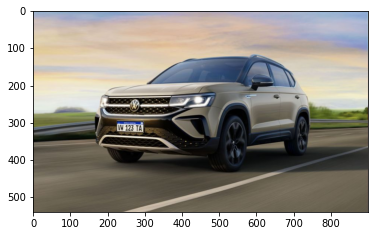

In [5]:
filename = f'{td_dir}/auto-3.jpg' 

carimage = io.imread(filename)

plt.imshow(carimage)


In [6]:
# Procedemos a llamar a la funcion detect_text
with open(filename, 'rb') as car_image:
    response = rekognition.detect_text(Image={
                                                'Bytes': car_image.read()
                                             }
                                      )
# https://docs.aws.amazon.com/rekognition/latest/dg/images-bytes.html

In [7]:
str(response)[:1024]

"{'TextDetections': [{'DetectedText': '- -', 'Type': 'LINE', 'Id': 0, 'Confidence': 78.05516052246094, 'Geometry': {'BoundingBox': {'Width': 0.03732066974043846, 'Height': 0.013156426139175892, 'Left': 0.2696422338485718, 'Top': 0.549749493598938}, 'Polygon': [{'X': 0.27033987641334534, 'Y': 0.549749493598938}, {'X': 0.30696290731430054, 'Y': 0.5521177649497986}, {'X': 0.306265264749527, 'Y': 0.5629059076309204}, {'X': 0.2696422338485718, 'Y': 0.560537576675415}]}}, {'DetectedText': 'VW 123 TA', 'Type': 'LINE', 'Id': 1, 'Confidence': 86.5503158569336, 'Geometry': {'BoundingBox': {'Width': 0.07265625149011612, 'Height': 0.0341796875, 'Left': 0.251953125, 'Top': 0.5634765625}, 'Polygon': [{'X': 0.251953125, 'Y': 0.5634765625}, {'X': 0.3246093690395355, 'Y': 0.5634765625}, {'X': 0.3246093690395355, 'Y': 0.59765625}, {'X': 0.251953125, 'Y': 0.59765625}]}}, {'DetectedText': '-', 'Type': 'WORD', 'Id': 2, 'ParentId': 0, 'Confidence': 67.60771942138672, 'Geometry': {'BoundingBox': {'Width': 0.

*** VW 123 TA ***


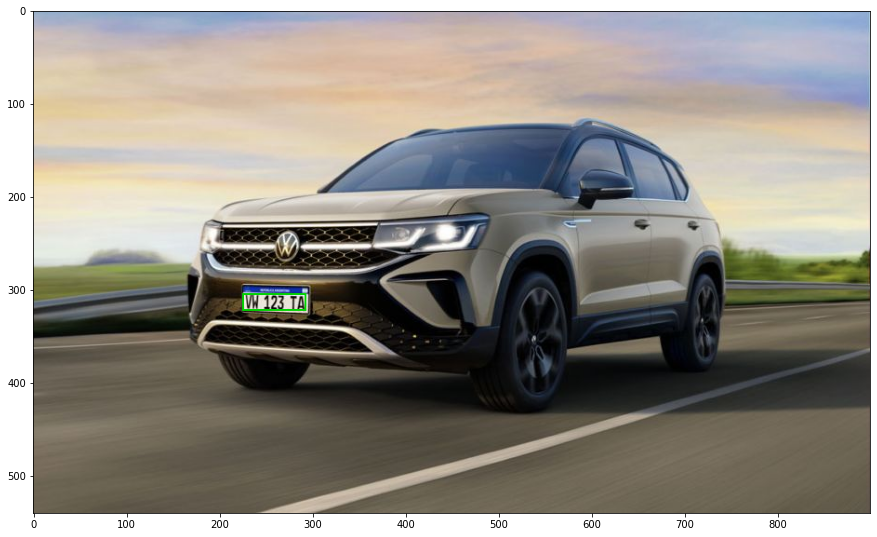

In [8]:
plt.figure(figsize=(15,15))
img = Image.open(filename)
imgWidth, imgHeight = img.size

draw = ImageDraw.Draw(img)
if response['ResponseMetadata']['HTTPStatusCode'] == 200:
    for detection in response['TextDetections']:
        if detection['Id'] == 1:
            print(f"*** {detection['DetectedText']} ***")
            box = detection['Geometry']['BoundingBox']
            left = imgWidth * box['Left']
            top = imgHeight * box['Top']
            width = imgWidth * box['Width']
            height = imgHeight * box['Height']

    points = (
                (left,top), 
                (left+width,top),
                (left+width,top+height), 
                (left,top+height), 
                (left,top),
            )
    
    draw.line(points, fill='#00d400', width=2)

plt.imshow(img);


# https://docs.aws.amazon.com/rekognition/latest/dg/images-displaying-bounding-boxes.html

## Detecting faces in an image [docs](https://docs.aws.amazon.com/rekognition/latest/dg/faces-detect-images.html)

In [9]:
!ls face_detection

face_detection-emotions_1.jpg  face_detection-emotions_3.jpg
face_detection-emotions_2.jpg  face_detection.png


In [10]:
fd_dir = 'face_detection'

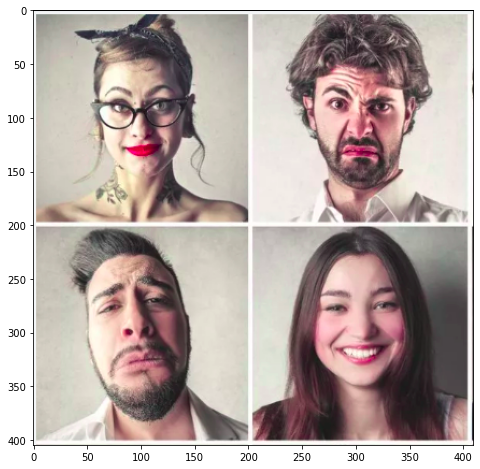

In [11]:
filename = f'{fd_dir}/face_detection.png' 

fd_image = io.imread(filename)

plt.figure(figsize=(8,8))
plt.imshow(fd_image)

In [19]:
with open(filename, 'rb') as image:
    response = rekognition.detect_faces(Image={
                                                'Bytes': image.read()
                                             },
                                        Attributes=['ALL']
                                      )
#https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html#Rekognition.Client.detect_faces

In [20]:
str(response)[:1024]

"{'FaceDetails': [{'BoundingBox': {'Width': 0.22504882514476776, 'Height': 0.3380185067653656, 'Left': 0.12042508274316788, 'Top': 0.5556281805038452}, 'AgeRange': {'Low': 28, 'High': 38}, 'Smile': {'Value': False, 'Confidence': 86.8493423461914}, 'Eyeglasses': {'Value': False, 'Confidence': 92.13092803955078}, 'Sunglasses': {'Value': False, 'Confidence': 96.96124267578125}, 'Gender': {'Value': 'Male', 'Confidence': 97.37761688232422}, 'Beard': {'Value': False, 'Confidence': 73.3707046508789}, 'Mustache': {'Value': False, 'Confidence': 89.83344268798828}, 'EyesOpen': {'Value': False, 'Confidence': 57.844329833984375}, 'MouthOpen': {'Value': False, 'Confidence': 70.16651916503906}, 'Emotions': [{'Type': 'SAD', 'Confidence': 95.72095489501953}, {'Type': 'DISGUSTED', 'Confidence': 2.4120290279388428}, {'Type': 'FEAR', 'Confidence': 0.6611160039901733}, {'Type': 'CONFUSED', 'Confidence': 0.556435227394104}, {'Type': 'ANGRY', 'Confidence': 0.23864802718162537}, {'Type': 'SURPRISED', 'Confid

### Dibujar 

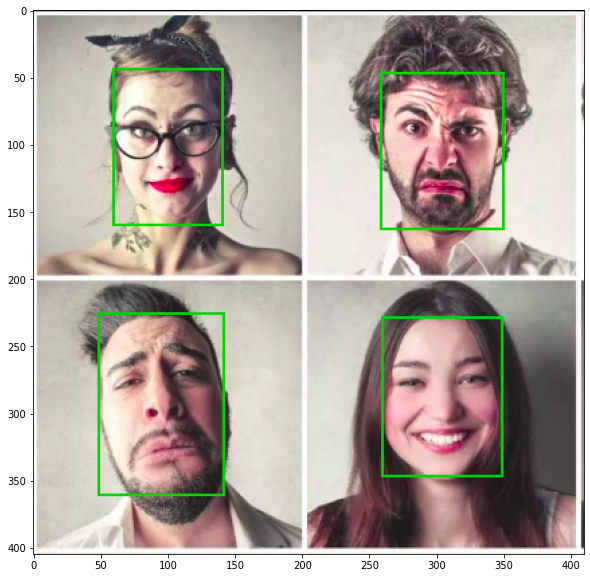

In [41]:
plt.figure(figsize=(10,10))
img = Image.open(filename)
imgWidth, imgHeight = img.size

draw = ImageDraw.Draw(img)
for detection in response['FaceDetails']:
    box = detection['BoundingBox']
    left = imgWidth * box['Left']
    top = imgHeight * box['Top']
    width = imgWidth * box['Width']
    height = imgHeight * box['Height']

    points = (
                (left,top), 
                (left+width,top),
                (left+width,top+height), 
                (left,top+height), 
                (left,top),
            )

    draw.line(points, fill='#00d400', width=2)


plt.imshow(img);


In [67]:
# Exploramos los atributos de cada imagen, para eso nos apoyamos en un par de funciones

def get_age_range(item):
    return f"{item['Low']}-{item['High']}"

def get_glasses(item):
    return f"{'Glasses' if item['Value'] else ''}"

def get_emotion(item):
    df = pd.DataFrame(item)
    df = df.sort_values(by='Confidence', ascending=False)
    return df['Type'].head(1).item()
    

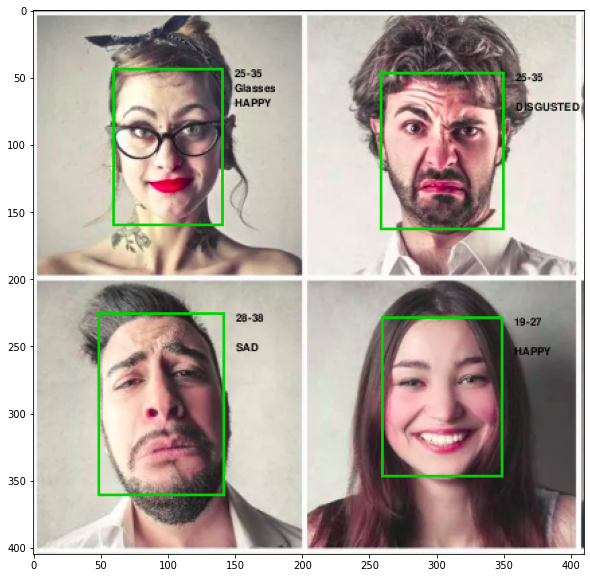

In [72]:
plt.figure(figsize=(10,10))
img = Image.open(filename)
imgWidth, imgHeight = img.size

fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeSansBold.ttf", 8)

draw = ImageDraw.Draw(img)
for detection in response['FaceDetails']:
    box = detection['BoundingBox']
    left = imgWidth * box['Left']
    top = imgHeight * box['Top']
    width = imgWidth * box['Width']
    height = imgHeight * box['Height']

    points = (
                (left,top), 
                (left+width,top),
                (left+width,top+height), 
                (left,top+height), 
                (left,top),
            )
    
    img_attr = get_age_range(detection['AgeRange'])
    img_attr += '\n' + get_glasses(detection['Eyeglasses'])
    img_attr += '\n' + get_emotion(detection['Emotions'])

    draw.line(points, fill='#00d400', width=2)
    draw.multiline_text((left+width+10,top), 
                        img_attr, 
                        font=fnt,
                        fill='black')

plt.imshow(img);